In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ingredient.csv')

In [3]:
df.shape

(214, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [5]:
#check unique value in columns
#if unique value less then 5% of the dataset the the feature is discrete

for col in df.columns:
    print("{}\t{}".format(col, len(df[col].unique())))


a	178
b	142
c	94
d	118
e	133
f	65
g	143
h	34
i	32


In [6]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [7]:
df.var()

a    0.000009
b    0.666841
c    2.080540
d    0.249270
e    0.599921
f    0.425354
g    2.025366
h    0.247227
i    0.009494
dtype: float64

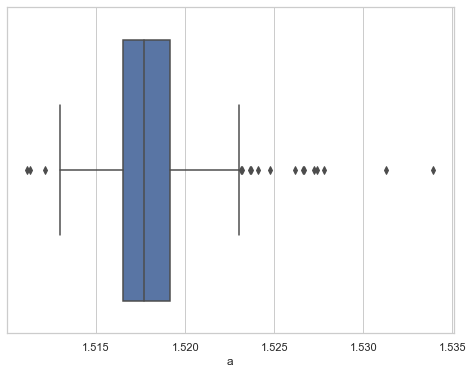

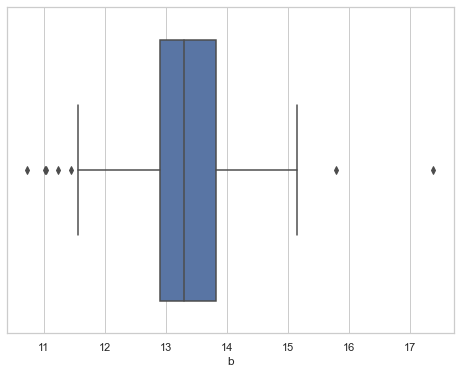

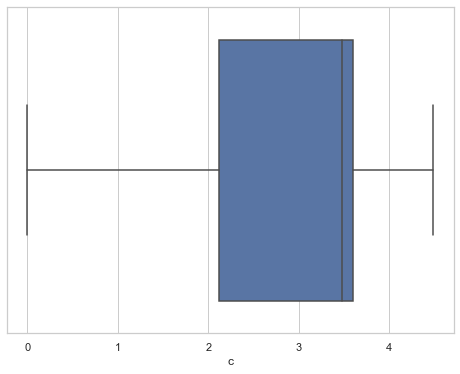

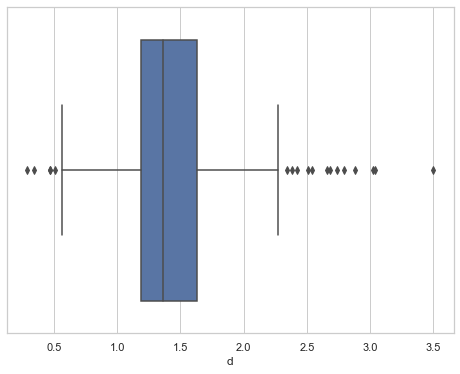

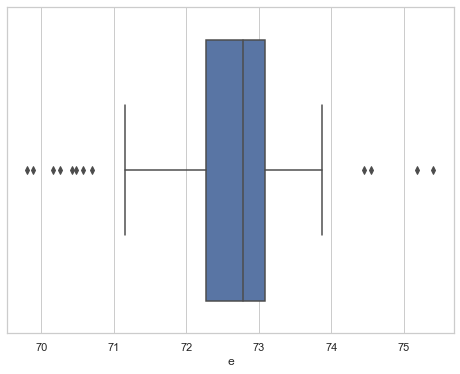

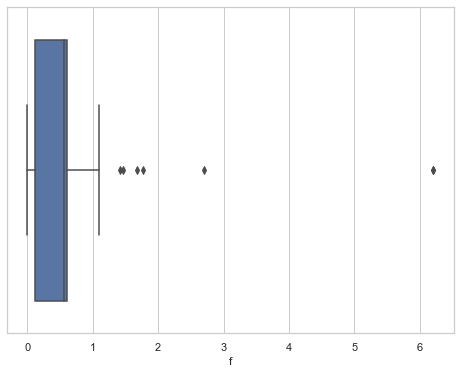

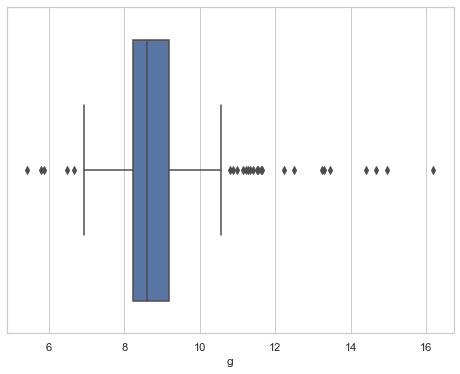

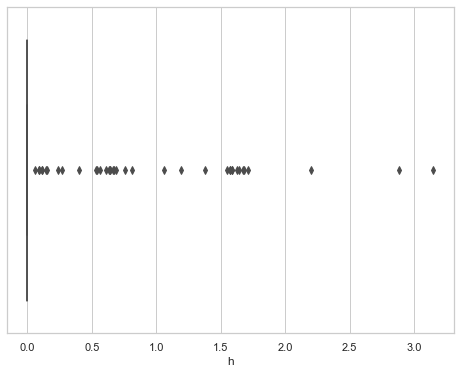

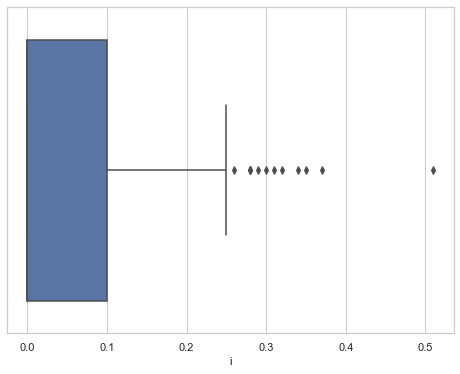

In [8]:
for i in df.columns:
    f, ax = plt.subplots(figsize=(8,6))
    sns.boxplot(x=df[i])
#     plt.savefig("task_1_box_{}.jpg".format(i),bbox_inches ="tight")
    plt.show()

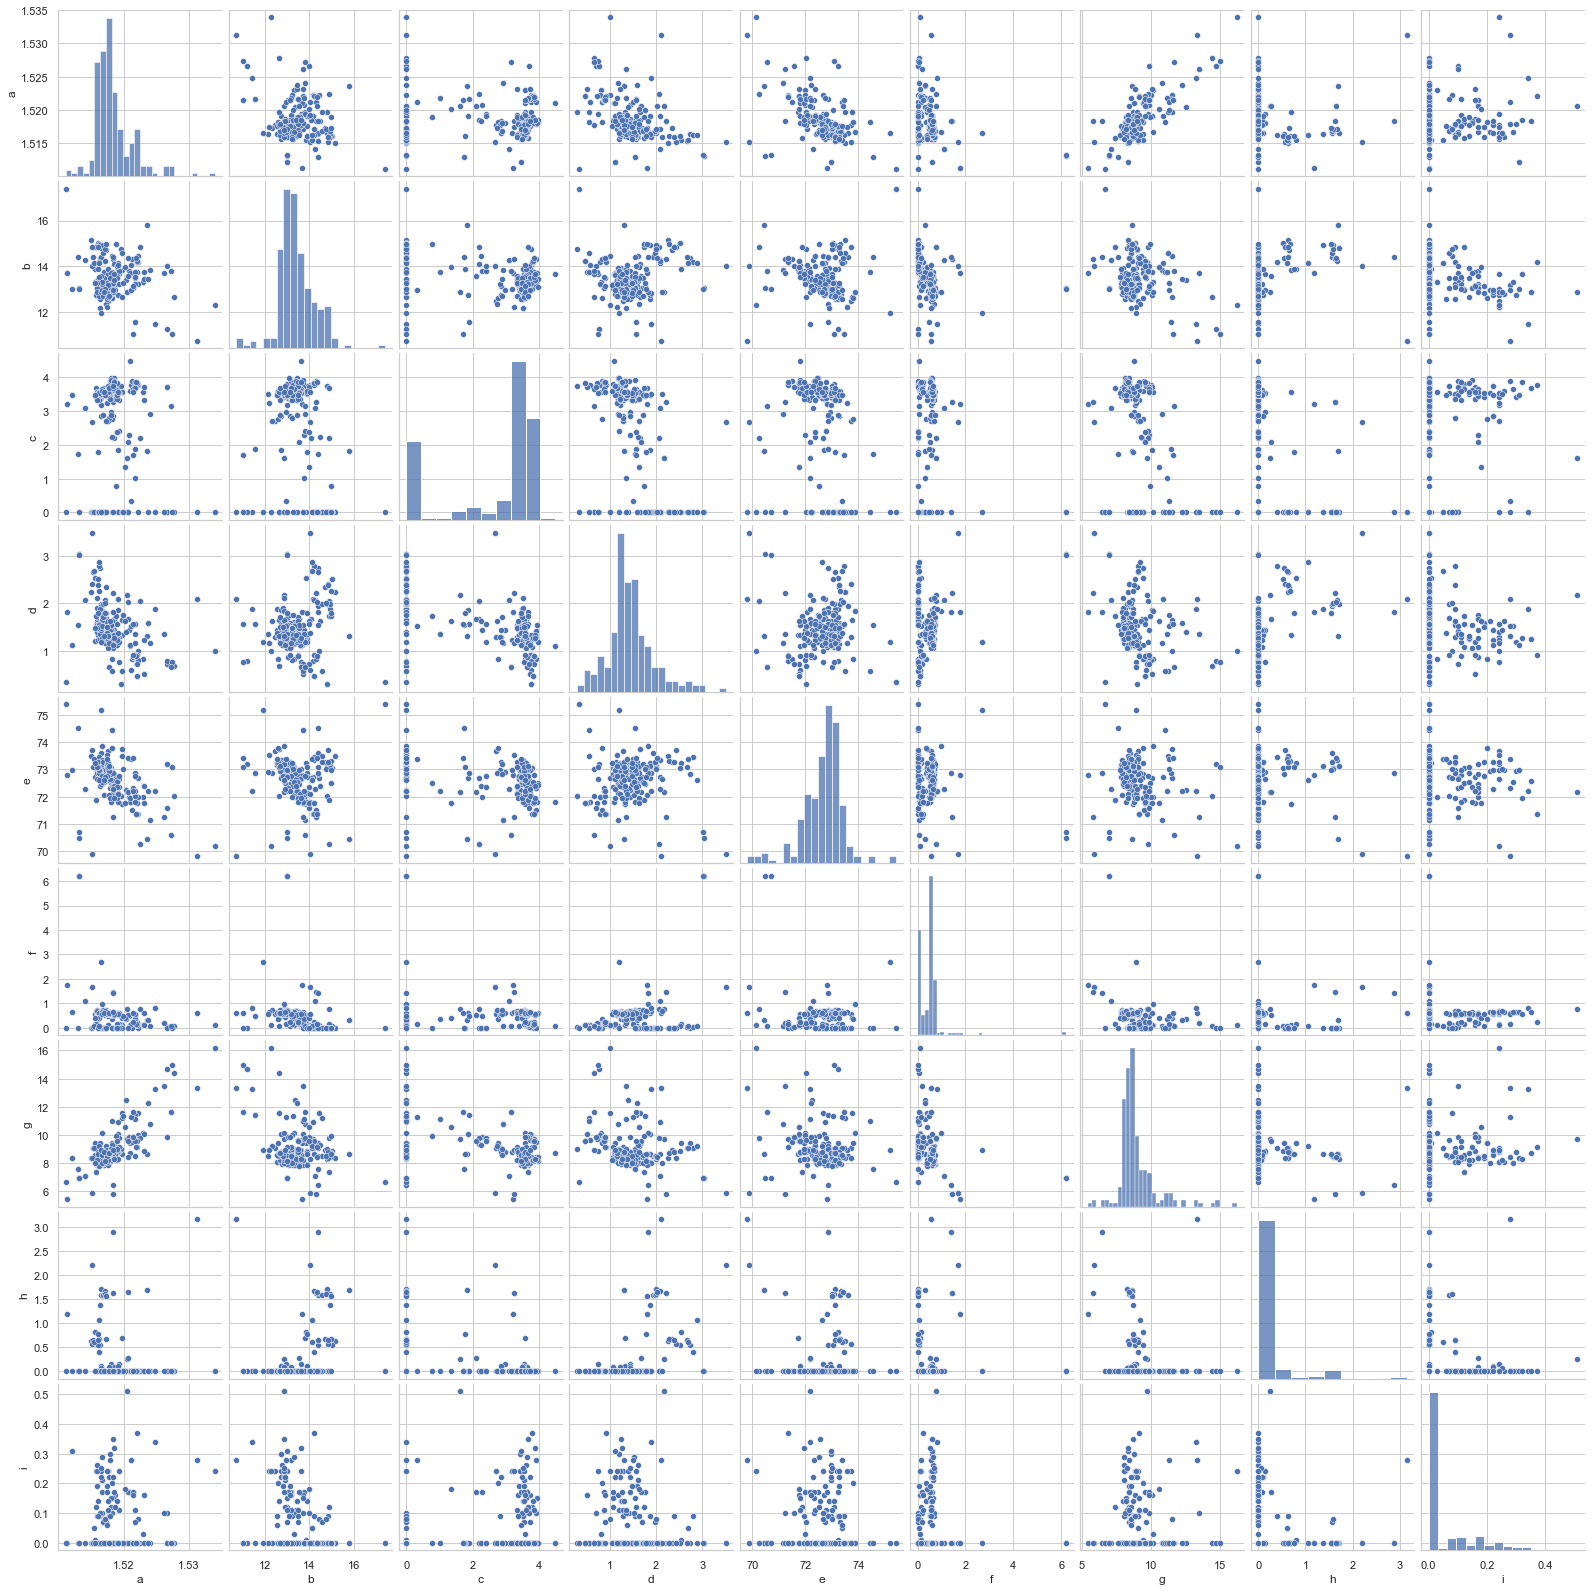

In [9]:
sns.pairplot(df)

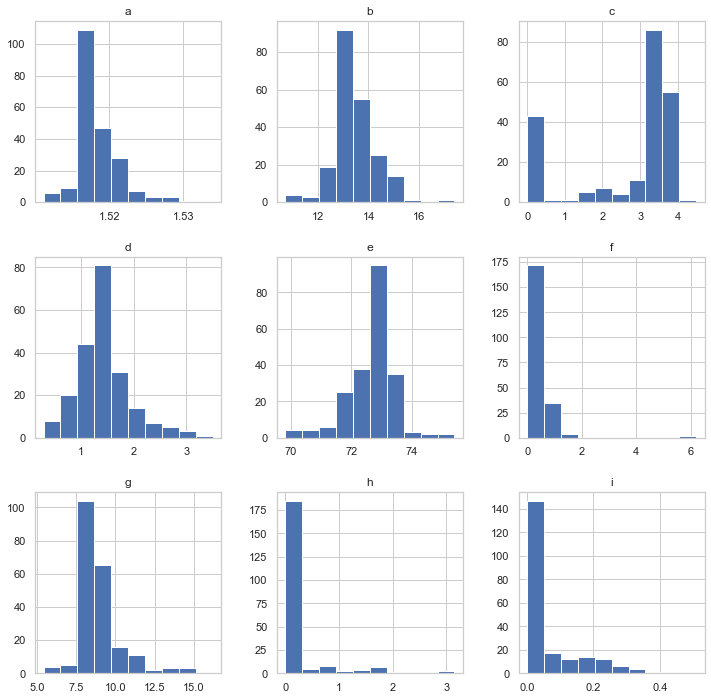

In [10]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(df.columns)//3, 3, figsize=(12,12))
''
i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column = df.columns[i], ax=axis)
        i = i+1
        
plt.savefig("task_1_hist.jpg",bbox_inches ="tight")

In [11]:
df.corr()

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


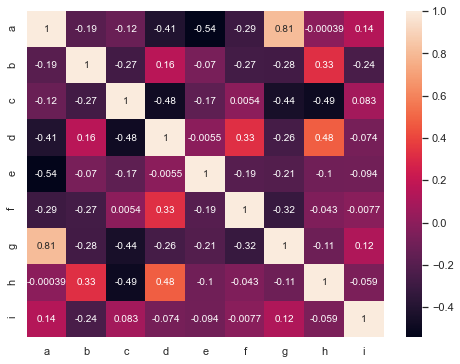

In [12]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.savefig("Task_1_corr.jpg",bbox_inches ="tight")

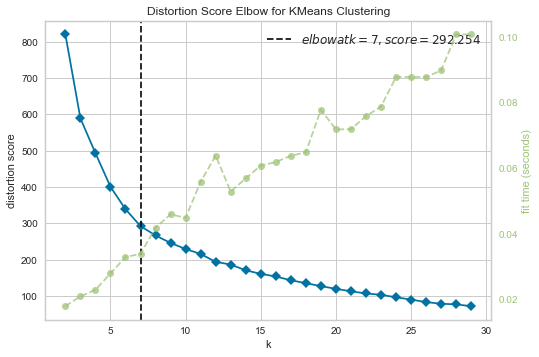

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
# k is range of number of clusters.
X = df.copy()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer

plt.savefig("Elbow_method.jpg",bbox_inches ="tight")
visualizer.show()        # Finalize and render figure


In [14]:
# Applying KMeans Clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)



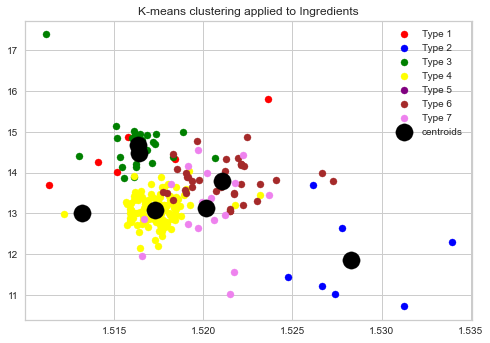

In [17]:
#Lets visualize the clusters and their centroids together

plt.figure(2)
plt.scatter(X.iloc[pred_y == 0, 0], X.iloc[pred_y == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(X.iloc[pred_y == 1, 0], X.iloc[pred_y == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(X.iloc[pred_y == 2, 0], X.iloc[pred_y == 2, 1], s = 50, c = 'green', label = 'Type 3')
plt.scatter(X.iloc[pred_y == 3, 0], X.iloc[pred_y == 3, 1], s = 50, c = 'yellow', label = 'Type 4')
plt.scatter(X.iloc[pred_y == 4, 0], X.iloc[pred_y == 4, 1], s = 50, c = 'purple', label = 'Type 5')
plt.scatter(X.iloc[pred_y == 5, 0], X.iloc[pred_y == 5, 1], s = 50, c = 'brown', label = 'Type 6')
plt.scatter(X.iloc[pred_y == 6, 0], X.iloc[pred_y == 6, 1], s = 50, c = 'violet', label = 'Type 7')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to Ingredients")

plt.legend()

plt.savefig("clustering.jpg",bbox_inches ="tight")
plt.show()